In [19]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis, norminvgauss, norm
from scipy.stats import hypsecant



In [2]:
with h5py.File('log_return_USD_EUR.hdf5', 'r') as f:
    data = f['log_return'][:]
    
print(f'data shape = {data.shape}')

data shape = (5623003,)


/home/dimitry/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


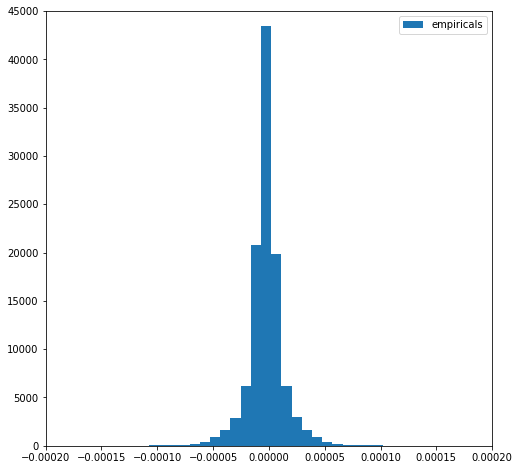

In [36]:
plt.figure(figsize=(8,8))
plt.hist(data, bins=500, normed=True, label='empiricals')
plt.axis([-0.0002, 0.0002, 0.0, 45000])
plt.legend()

plt.show()

In [39]:
print(f'E(X) = {data.mean()}\nV(X) = {data.var()}\nS(X) = {skew(data)}\nK(X) = {kurtosis(data)}')

E(X) = -1.3371440121051218e-09
V(X) = 3.1612253733245764e-10
S(X) = 0.5397881045526324
K(X) = 308.0818035956395


## Normal Inv. Gauss distribution

In [5]:
'''norminvgauss'''
a, b, loc, scale = norminvgauss.fit(data)

print(f'params for NIG dist:\n \na = {a}\nb = {b}\nloc = {loc}\nscale = {scale}')

/home/dimitry/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


params for NIG dist:
 
a = 2.418105355457438
b = 0.4622455055463453
loc = -3.653530903890878e-06
scale = 2.1979305700234286e-05


In [43]:
print(f'params for NIG dist:\n \na = {a}\nb = {b}\nloc = {loc}\nscale = {scale}')

params for NIG dist:
 
a = 2.418105355457438
b = 0.4622455055463453
loc = -3.653530903890878e-06
scale = 2.1979305700234286e-05


In [46]:
x = np.linspace(-0.0002, 0.0002, 1000)
rv = norminvgauss(a, b, loc, scale)

In [8]:
import seaborn as sns

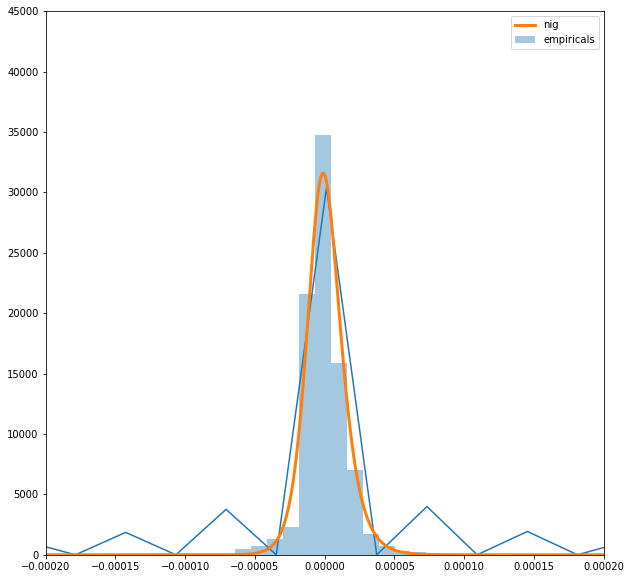

In [70]:
plt.figure(figsize=(10,10))
sns.distplot(data, bins=400, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
plt.plot(x, rv.pdf(x), label='nig', linewidth=3)
plt.axis([-0.0002, 0.0002, 0.0, 45000])
plt.legend()

plt.show()

In [154]:
a = 2.418105355457438
b = 0.4622455055463453
loc = -3.653530903890878e-06
scale = 2.1979305700234286e-05

In [155]:
kstest(data, 'norminvgauss', (a, b, loc, scale))


KeyboardInterrupt: 

## Hypsecant

In [41]:
hs_params = hypsecant.fit(data)
HS_loc, HS_scale = hs_params
HS_rv = hypsecant(HS_loc, HS_scale)

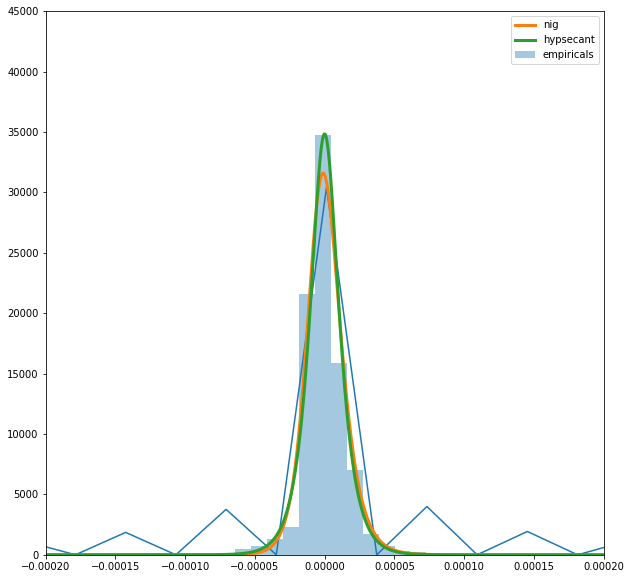

In [91]:
plt.figure(figsize=(10,10))
sns.distplot(data, bins=400, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
plt.plot(x, rv.pdf(x), label='nig', linewidth=3)
plt.plot(x, HS_rv.pdf(x), label='hypsecant', linewidth=3)

plt.axis([-0.0002, 0.0002, 0.0, 45000])
plt.legend()

plt.show()

In [ ]:
kstest(data, 'norminvgauss', )

## Сравнение хвостов

In [61]:
data_hist = np.histogram(data ,bins = 50)

In [62]:
#x = np.linspace(-0.0002, 0.0002, 1000)
rv = norminvgauss(a, b, loc, scale)
NIG_data = rv.rvs(size=5623003)
NIG_data_hist = np.histogram(NIG_data ,bins = 50)

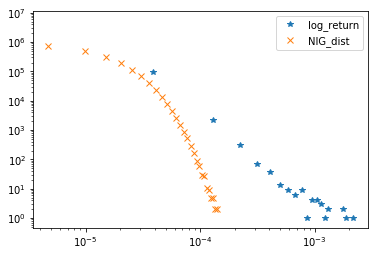

In [68]:
plt.yscale('log')
plt.xscale('log')
plt.plot(data_hist[1][:-1],data_hist[0],'*', label='log_return')
plt.plot(NIG_data_hist[1][:-1],NIG_data_hist[0],'x', label='NIG_dist')
plt.legend()
plt.show()

In [65]:
HS_data = HS_rv.rvs(size=5623003)
HS_data_hist = np.histogram(HS_data ,bins = 50)

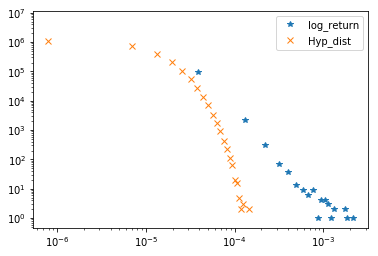

In [67]:
plt.yscale('log')
plt.xscale('log')
plt.plot(data_hist[1][:-1],data_hist[0],'*', label='log_return')
plt.plot(HS_data_hist[1][:-1],HS_data_hist[0],'x', label='Hyp_dist')
plt.legend()
plt.show()

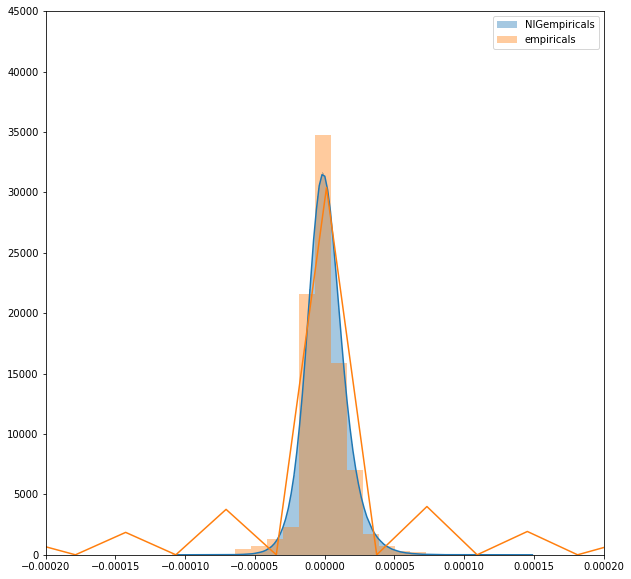

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(NIG_data, bins=400, norm_hist=True, label='NIGempiricals')
sns.distplot(data, bins=400, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
#plt.plot(x, rv.pdf(x), label='nig', linewidth=3)
plt.axis([-0.0002, 0.0002, 0.0, 45000])
plt.legend()

plt.show()

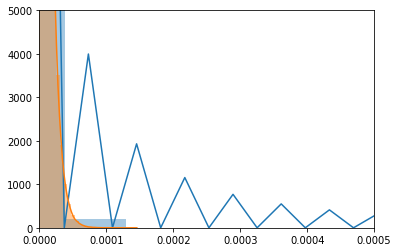

In [59]:
plt.axis([0.0,0.0005, 0, 5000]) 
sns.distplot(data)
sns.distplot(HS_data)

#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [75]:
a = '1,401'
#a = a.replace(',', '.')
float(a.replace(',', '.'))

1.401

In [72]:
a.replace(',', '.')


'1.401'

# Дневные Данные за 19 лет

## Normal Inv. Gauss

In [2]:
with h5py.File('log_return_2000_2019.hdf5', 'r') as f:
    day_data = f['log_return'][:]
    
print(f'day_data shape = {day_data.shape}')

day_data shape = (4999,)


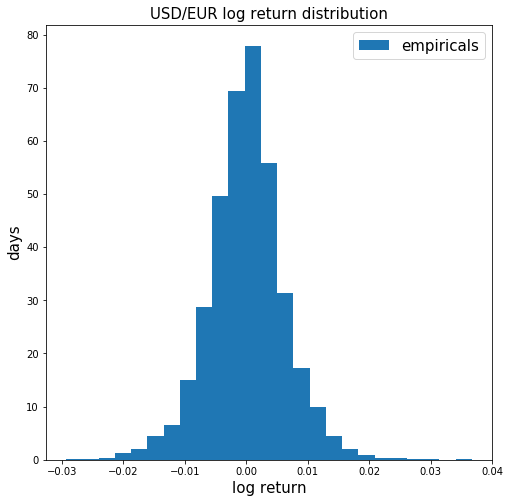

In [3]:
plt.figure(figsize=(8,8))
plt.title('USD/EUR log return distribution', size=15)
plt.hist(day_data, bins=25, density=True, label='empiricals')
#plt.axis([-0.0002, 0.0002, 0.0, 45000])
plt.xlabel('log return', size=15)
plt.ylabel('days', size=15)
plt.legend(fontsize=15)

plt.show()

In [4]:
'''norminvgauss'''
a_1, b_1, loc_1, scale_1 = norminvgauss.fit(day_data)
x = np.linspace(-0.04, 0.04, 5000)
NIG_rv_1 = norminvgauss(a_1, b_1, loc_1, scale_1)

print(f'params for NIG dist:\n \na = {a_1}\nb = {b_1}\nloc = {loc_1}\nscale = {scale_1}')

params for NIG dist:
 
a = 1.477259988957097
b = -0.026410734138276562
loc = 0.0001625833543173497
scale = 0.007542533323985308


In [5]:
'''normal dist'''
loc_norm, scale_norm = norm.fit(day_data)
NORM_rv_1 = norm(loc_norm, scale_norm)

print(f'params for normal dist:\n \nloc = {loc_norm}\nscale = {scale_norm}')

params for normal dist:
 
loc = 2.7757883921834868e-05
scale = 0.006186045819521144


/home/dimitry/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


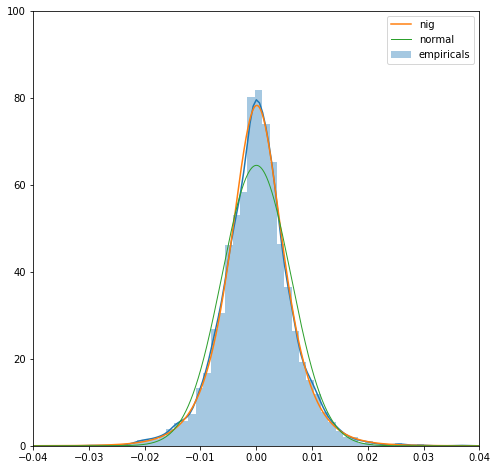

In [9]:
plt.figure(figsize=(8,8))
sns.distplot(day_data, bins=50, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
plt.plot(x, NIG_rv_1.pdf(x), label='nig')
plt.plot(x, NORM_rv_1.pdf(x), label='normal', linewidth=1)

plt.axis([-0.04, 0.04, 0.0, 100])
plt.legend()

plt.show()

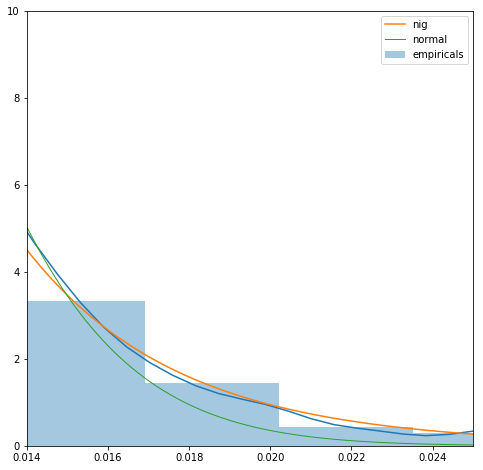

In [10]:
plt.figure(figsize=(8,8))
sns.distplot(day_data, bins=20, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
plt.plot(x, NIG_rv_1.pdf(x), label='nig')
plt.plot(x, NORM_rv_1.pdf(x), label='normal', linewidth=1)

plt.axis([0.014, 0.025, 0.0, 10])
plt.legend()

plt.show()

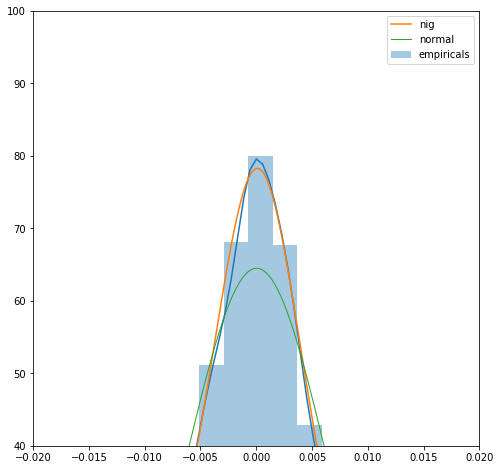

In [11]:
plt.figure(figsize=(8,8))
sns.distplot(day_data, bins=30, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
plt.plot(x, NIG_rv_1.pdf(x), label='nig')
plt.plot(x, NORM_rv_1.pdf(x), label='normal', linewidth=1)

plt.axis([-0.02, 0.02, 40, 100])
plt.legend()

plt.show()

In [12]:
day_data_hist = np.histogram(day_data ,bins = 50)

NIG_data = NIG_rv_1.rvs(size=4999)
NIG_data_hist = np.histogram(NIG_data ,bins = 50)

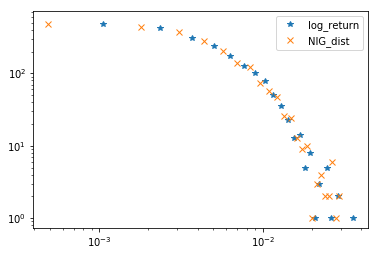

In [13]:
plt.yscale('log')
plt.xscale('log')
plt.plot(day_data_hist[1][:-1], day_data_hist[0],'*', label='log_return')
plt.plot(NIG_data_hist[1][:-1], NIG_data_hist[0],'x', label='NIG_dist')
plt.legend()
plt.show()

## ks_test for day_data log retrun dist and NIG dist

In [14]:
from scipy.stats import kstest

In [15]:
'''for normal'''
kstest(day_data, 'norm')

KstestResult(statistic=0.4902240315700185, pvalue=0.0)

In [16]:
kstest(day_data, 'norminvgauss', (a_1, b_1, loc_1, scale_1))

KstestResult(statistic=0.014820214945559018, pvalue=0.22219960455356919)

## Hypsecant

In [20]:
HS_loc_1, HS_scale_1 = hypsecant.fit(day_data)
HS_rv_1 = hypsecant(HS_loc_1, HS_scale_1)

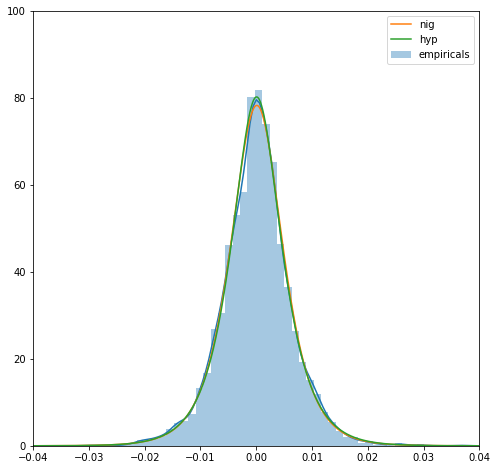

In [21]:
plt.figure(figsize=(8,8))
sns.distplot(day_data, bins=50, norm_hist=True, label='empiricals')
#plt.hist(data, bins=400, normed=True, label='empiricals')
plt.plot(x, NIG_rv_1.pdf(x), label='nig')
#plt.plot(x, NORM_rv_1.pdf(x), label='normal', linewidth=1)
plt.plot(x, HS_rv_1.pdf(x), label='hyp')

plt.axis([-0.04, 0.04, 0.0, 100])
plt.legend()

plt.show()

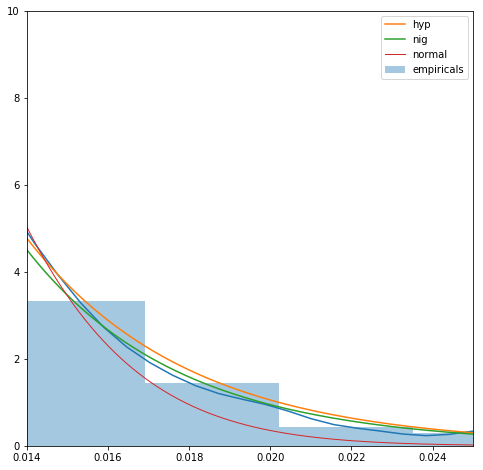

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(day_data, bins=20, norm_hist=True, label='empiricals')
plt.plot(x, HS_rv_1.pdf(x), label='hyp')
plt.plot(x, NIG_rv_1.pdf(x), label='nig')
plt.plot(x, NORM_rv_1.pdf(x), label='normal', linewidth=1)


plt.axis([0.014, 0.025, 0.0, 10])
plt.legend()

plt.show()

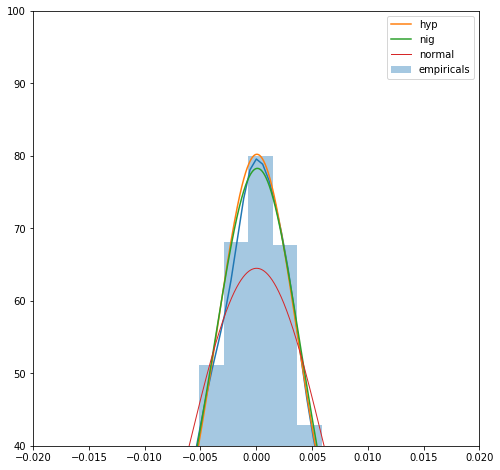

In [23]:
plt.figure(figsize=(8,8))
sns.distplot(day_data, bins=30, norm_hist=True, label='empiricals')
plt.plot(x, HS_rv_1.pdf(x), label='hyp')
plt.plot(x, NIG_rv_1.pdf(x), label='nig')
plt.plot(x, NORM_rv_1.pdf(x), label='normal', linewidth=1)

plt.axis([-0.02, 0.02, 40, 100])
plt.legend()

plt.show()

## Хвосты

In [24]:
day_data_hist = np.histogram(day_data ,bins = 50)

HS_data_1 = HS_rv_1.rvs(size=4999)
HS_data_1_hist = np.histogram(HS_data_1 ,bins = 50)

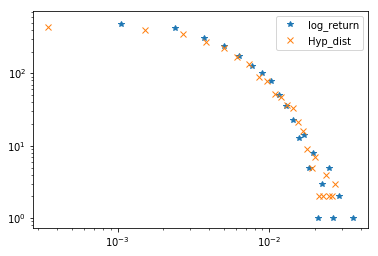

In [25]:
plt.yscale('log')
plt.xscale('log')
plt.plot(day_data_hist[1][:-1], day_data_hist[0],'*', label='log_return')
plt.plot(HS_data_1_hist[1][:-1], HS_data_1_hist[0],'x', label='Hyp_dist')
plt.legend()
plt.show()

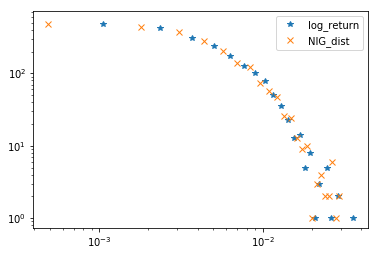

In [26]:
plt.yscale('log')
plt.xscale('log')
plt.plot(day_data_hist[1][:-1], day_data_hist[0],'*', label='log_return')
plt.plot(NIG_data_hist[1][:-1], NIG_data_hist[0],'x', label='NIG_dist')
plt.legend()
plt.show()

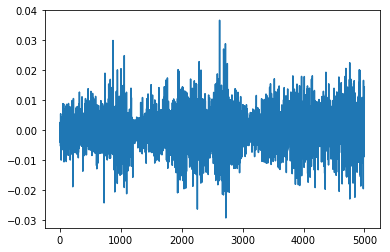

In [27]:
plt.plot(np.arange(0, 4999), day_data)
plt.show()

In [59]:
'''Hyp'''
kstest(day_data, 'hypsecant', (HS_loc_1, HS_scale_1))

KstestResult(statistic=0.012432576906348303, pvalue=0.4223286879527691)

In [60]:
'''NIG'''
kstest(day_data, 'norminvgauss', (a_1, b_1, loc_1, scale_1))

KstestResult(statistic=0.014820214945559018, pvalue=0.22219960455356919)

Рассказ о законах распределения погрешности измерений был бы неполным, если не упомянуть об связи между энтропийным и среднеквадратичным значением погрешности. Не утомляя читателей длинными выкладками из информационной теории измерений [1], сразу сформулирую результат. 

С точки зрения информации, нормальное распределение приводит к получению точно такого же количества информации, как и равномерное. Запишем выражение для погрешности delta0 с использованием функций приведённых выше библиотек для распределения случайной величины x.

Это позволяет заменить любой закон распределения погрешности равномерным с тем же значением delta0.

Введём ещё один показатель – энтропийный коэффициент k, который для нормального распределения равен: 
k= delta0/ np.std(x) = 2.07

In [61]:
delta0 = np.std(day_data) * np.sqrt(np.pi * np.e * 0.5)
k = delta0 / np.std(day_data)
print(f'Энтропийный коэффициент k = {k}')

Энтропийный коэффициент k = 2.0663656770612464


Следует отметить, что любое распределение отличное от нормального, будет иметь меньший энтропийный коэффициент.